 What You're Aiming For

    Dataset Selection:
        Head over to Kaggle and choose a dataset that aligns with your interests. Ensure it involves either a classification or regression task.
        Real-world data can be messy, and that's perfectly fine! You're here to tame it.
    Data Preprocessing:
        Identify and handle missing values within your dataset. Employ effective strategies for dealing with missing data.
        Implement data cleaning, formatting, and organization to prepare your dataset for training.
    Feature Engineering:
        Enhance your model's performance by creating new features or transforming existing ones.
        Tailor your feature engineering techniques to address the specific needs of your chosen project.
    Data Visualization:
        Utilize data visualization techniques to gain insights into your dataset.
        Create visualizations that reveal patterns and relationships, aiding your understanding of the data.
    Model Selection:
        Choose the right model based on the nature of your problem.
        Consider factors such as the task type (classification or regression), dataset size, and alignment with algorithm assumptions.
    Model Evaluation:
        Evaluate your model's performance using appropriate metrics for the chosen task (accuracy, classification reports, confusion matrices).
        Use appropriate methods: hyper parameter tuning, cross validation, etc.
        Justify your model selection and discuss the implications of your results.
    Project Submission:
        Share your code and findings in the assignment section. Provide clear documentation and explanations.
        Highlight any challenges faced during the project and how you overcame them.

In [51]:
import pandas as pd

In [52]:
df = pd.read_csv(r"C:\Users\HP\Documents\stream\accident.csv")
df

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0
...,...,...,...,...,...,...
195,69,Female,111.0,No,Yes,1
196,30,Female,51.0,No,Yes,1
197,58,Male,110.0,No,Yes,1
198,20,Male,103.0,No,Yes,1


In [53]:
df.head(5)

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [54]:
df.isnull().sum()

Age                0
Gender             1
Speed_of_Impact    3
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

In [55]:
df.isnull().any()

Age                False
Gender              True
Speed_of_Impact     True
Helmet_Used        False
Seatbelt_Used      False
Survived           False
dtype: bool

In [56]:
df = df.dropna() #dropped all null values/columns
df

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0
...,...,...,...,...,...,...
195,69,Female,111.0,No,Yes,1
196,30,Female,51.0,No,Yes,1
197,58,Male,110.0,No,Yes,1
198,20,Male,103.0,No,Yes,1


In [57]:
df.shape

(196, 6)

In [58]:
df.duplicated().any() #no duplicates in this dataframe

False

In [48]:
df = pd.concat([df, df_encoded], axis=1)
df.drop(columns=["Gender"], inplace=True)

In [49]:
df

,Age,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived,Age,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived,Gender_Male
0,56,27.0,No,No,1,56,27.0,No,No,1,False
1,69,46.0,No,Yes,1,69,46.0,No,Yes,1,False
2,46,46.0,Yes,Yes,0,46,46.0,Yes,Yes,0,True
3,32,117.0,No,Yes,0,32,117.0,No,Yes,0,True
4,60,40.0,Yes,Yes,0,60,40.0,Yes,Yes,0,False
...,...,...,...,...,...,...,...,...,...,...,...
195,69,111.0,No,Yes,1,69,111.0,No,Yes,1,False
196,30,51.0,No,Yes,1,30,51.0,No,Yes,1,False
197,58,110.0,No,Yes,1,58,110.0,No,Yes,1,True
198,20,103.0,No,Yes,1,20,103.0,No,Yes,1,True


In [59]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Helmet_Used'] = label_encoder.fit_transform(df['Helmet_Used'])
df['Seatbelt_Used'] = label_encoder.fit_transform(df['Seatbelt_Used'])

print(df)



     Age  Gender  Speed_of_Impact  Helmet_Used  Seatbelt_Used  Survived
0     56  Female             27.0            0              0         1
1     69  Female             46.0            0              1         1
2     46    Male             46.0            1              1         0
3     32    Male            117.0            0              1         0
4     60  Female             40.0            1              1         0
..   ...     ...              ...          ...            ...       ...
195   69  Female            111.0            0              1         1
196   30  Female             51.0            0              1         1
197   58    Male            110.0            0              1         1
198   20    Male            103.0            0              1         1
199   56  Female             43.0            0              1         1

[196 rows x 6 columns]


C:\Users\HP\AppData\Local\Temp\ipykernel_17228\1373437478.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Helmet_Used'] = label_encoder.fit_transform(df['Helmet_Used'])
C:\Users\HP\AppData\Local\Temp\ipykernel_17228\1373437478.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Seatbelt_Used'] = label_encoder.fit_transform(df['Seatbelt_Used'])


In [60]:
df

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,0,0,1
1,69,Female,46.0,0,1,1
2,46,Male,46.0,1,1,0
3,32,Male,117.0,0,1,0
4,60,Female,40.0,1,1,0
...,...,...,...,...,...,...
195,69,Female,111.0,0,1,1
196,30,Female,51.0,0,1,1
197,58,Male,110.0,0,1,1
198,20,Male,103.0,0,1,1


In [61]:
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [62]:
df = pd.concat([df, df_encoded], axis=1)
df.drop(columns=["Gender"], inplace=True)

In [63]:
df

,Age,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived,Age,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived,Gender_Male
0,56,27.0,0,0,1,56,27.0,0,0,1,False
1,69,46.0,0,1,1,69,46.0,0,1,1,False
2,46,46.0,1,1,0,46,46.0,1,1,0,True
3,32,117.0,0,1,0,32,117.0,0,1,0,True
4,60,40.0,1,1,0,60,40.0,1,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...
195,69,111.0,0,1,1,69,111.0,0,1,1,False
196,30,51.0,0,1,1,30,51.0,0,1,1,False
197,58,110.0,0,1,1,58,110.0,0,1,1,True
198,20,103.0,0,1,1,20,103.0,0,1,1,True


In [68]:
df.Survived

,Survived,Survived
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
195,1,1
196,1,1
197,1,1
198,1,1


In [69]:
df = df.loc[:, ~df.columns.duplicated()]
df

,Age,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived,Gender_Male
0,56,27.0,0,0,1,False
1,69,46.0,0,1,1,False
2,46,46.0,1,1,0,True
3,32,117.0,0,1,0,True
4,60,40.0,1,1,0,False
...,...,...,...,...,...,...
195,69,111.0,0,1,1,False
196,30,51.0,0,1,1,False
197,58,110.0,0,1,1,True
198,20,103.0,0,1,1,True


In [70]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [71]:
X = df.drop(columns=['Survived'])  
y = df[['Survived']]  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [72]:
y_pred = model.predict(X_test)

In [73]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

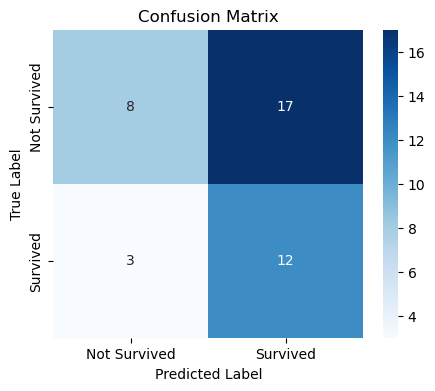

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
